In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Taking the usefull columns 

In [4]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

# Copy the selected columns to the man data frame

In [5]:
df = df[data_columns].copy()

# Renaming due to unwanted spaces

In [6]:
data = df.rename({'Country':'country', 'Region':'region','Happiness Score':'Happiness_Score','Economy (GDP per Capita)':'GDP_per_Capita','Family':'family','Health (Life Expectancy)':'Health','Freedom':'freedom','Trust (Government Corruption)':'Corruption','Generosity':'generosity'}, axis=1)

In [7]:
data.head()

,country,region,Happiness_Score,GDP_per_Capita,family,Health,freedom,Corruption,generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# Checking the null values

In [8]:
data.isnull().sum()

country            0
region             0
Happiness_Score    0
GDP_per_Capita     0
family             0
Health             0
freedom            0
Corruption         0
generosity         0
dtype: int64

# Plot between Happiness score and GDP

Text(0, 0.5, 'GDP Per Capita')

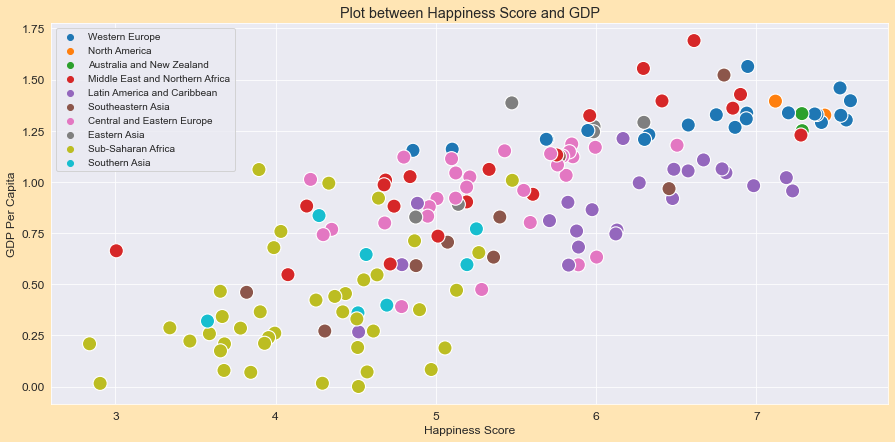

In [9]:
plt.figure(figsize=(15,7))
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = data.Happiness_Score, y = data.GDP_per_Capita, hue=data.region, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')

# Region by GDP

In [10]:
gdp_region = data.groupby('region')['GDP_per_Capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_Capita, dtype: float64

# Region by GDP using pie plot for better understnading

Text(0, 0.5, '')

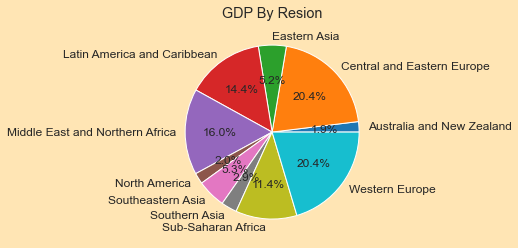

In [11]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP By Resion')
plt.ylabel('')

# Region country wise

In [12]:
total_countries = data.groupby('region')[['country']].count()
print(total_countries)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


# Finding the correlation for better understanding

<AxesSubplot:>

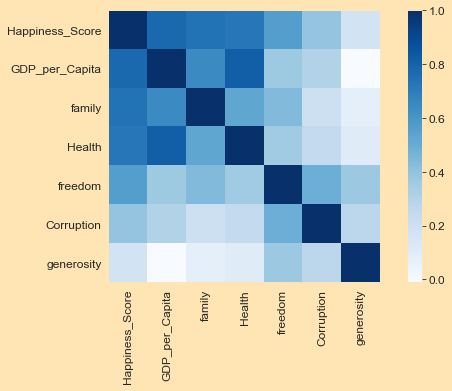

In [13]:
cor = data.corr(method= 'pearson')
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = bool),
            cmap='Blues', square=True, ax=ax)

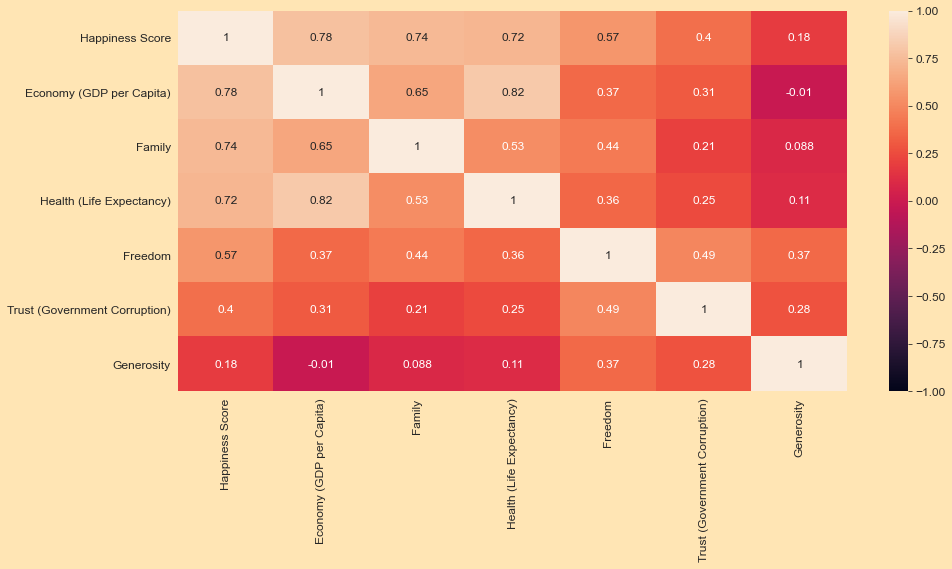

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

# Corruption region wise

In [15]:
corruption = data.groupby('region')[['Corruption']].mean()
print(corruption)

                                 Corruption
region                                     
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463


# Checking the dtypes for traning the model

In [16]:
data.dtypes

country             object
region              object
Happiness_Score    float64
GDP_per_Capita     float64
family             float64
Health             float64
freedom            float64
Corruption         float64
generosity         float64
dtype: object

# Preprocessing

### Deleting the unwanted columns

In [17]:
data.drop(['country','region'], axis=1, inplace=True)

### spliting the data

In [18]:
Y = data['Happiness_Score']
X = data.drop('Happiness_Score', axis=1)

# Scaling data using MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [54]:
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [55]:
x

,GDP_per_Capita,family,Health,freedom,Corruption,generosity
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

# Traning the model

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
print(f'Regression R2:{model.score(x_test, y_test)}')

Regression R2:0.8060054142580595
